In [1]:
!pip install tensorflow-datasets

  Using cached tensorflow_datasets-4.9.8-py3-none-any.whl.metadata (11 kB)
  Using cached dm_tree-0.1.9-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached etils-1.12.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached immutabledict-4.2.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached pyarrow-20.0.0-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached simple_parsing-0.1.7-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.17.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached zipp-3.21.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
  Using cached googleapis_common_protos-1.70.0-py3


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install tensorflow-addons

   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ----------------------------- ---------- 524.3/719.8 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 719.8/719.8 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
# this block loads a dataset from tensorflow repository
# and also it include tensorflow lib
import tensorflow_datasets as tfds
import tensorflow as tf

In [3]:
# now it loads data for training and data for testing, also it loads info about
# this dataset
train_data, info = tfds.load("fashion_mnist", with_info=True, split="train")
test_data = tfds.load("fashion_mnist", split="test")

In [4]:
# give names of each in the dataset
names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
# import different stuff for plotting
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams["figure.figsize"] = [10, 10]
rcParams['xtick.labelbottom'] = False

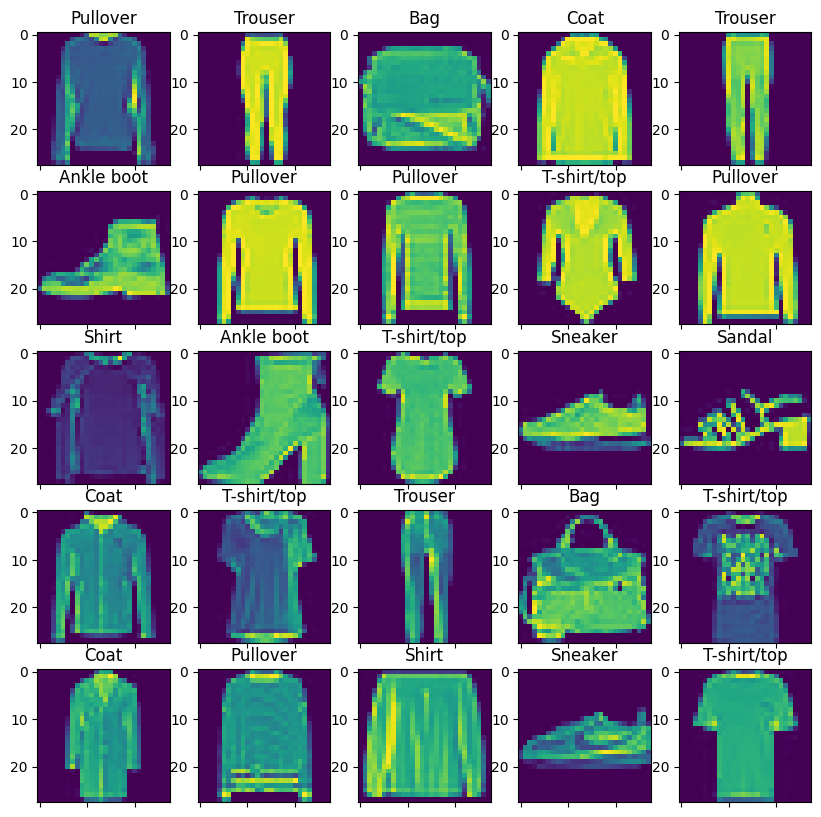

In [6]:
# finally plot it on the
for idx, elem in enumerate(train_data.take(25)):
    plt.subplot(5, 5, idx + 1, title=names[elem['label'].numpy()])
    plt.imshow(elem['image'][:, :, 0])

In [11]:
# this function does the simplest pre-processing, it just unzip loaded data
# in more comfortable way
def preprocessing(data):
    x = tf.cast(data["image"], tf.float32)
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y


def preprocessing_with_norm(data):
    x = tf.cast(data["image"], tf.float32) / 255.0
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y

In [12]:
# pre-process the train and the test data

train_data_pre_1 = train_data.map(preprocessing_with_norm)
train_data_pre = train_data_pre_1.concatenate(train_data_pre_1)

test_data_pre = test_data.map(preprocessing_with_norm)

batch_size = 64
train_data_pre = train_data_pre.batch(batch_size)
test_data_pre = test_data_pre.batch(batch_size)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D


def base_model():
    model_ = Sequential()
    model_.add(Input(shape=(28, 28, 1)))
    model_.add(Conv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))
    model_.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))
    model_.add(Conv2D(filters=24, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
    model_.add(Flatten())
    model_.add(Dense(units=64, activation='relu'))
    model_.add(Dense(units=10, activation='softmax'))

    return model_

In [16]:
model = base_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 8)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 24)       │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1176)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        75,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,746 (307.60 KB)

 Trainable params: 78,746 (307.60 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=["accuracy"])

In [18]:
history = model.fit(train_data_pre, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7734 - loss: 0.6230
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8916 - loss: 0.2982
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9099 - loss: 0.2461
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9204 - loss: 0.2159
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9297 - loss: 0.1929
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9379 - loss: 0.1739
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9442 - loss: 0.1579
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9503 - loss: 0.1439
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9555 - loss: 0.1311
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9596 - loss: 0.1196
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9633 - loss: 0.1091
Epoch 12/15
1875/1875 ━━━━━━━

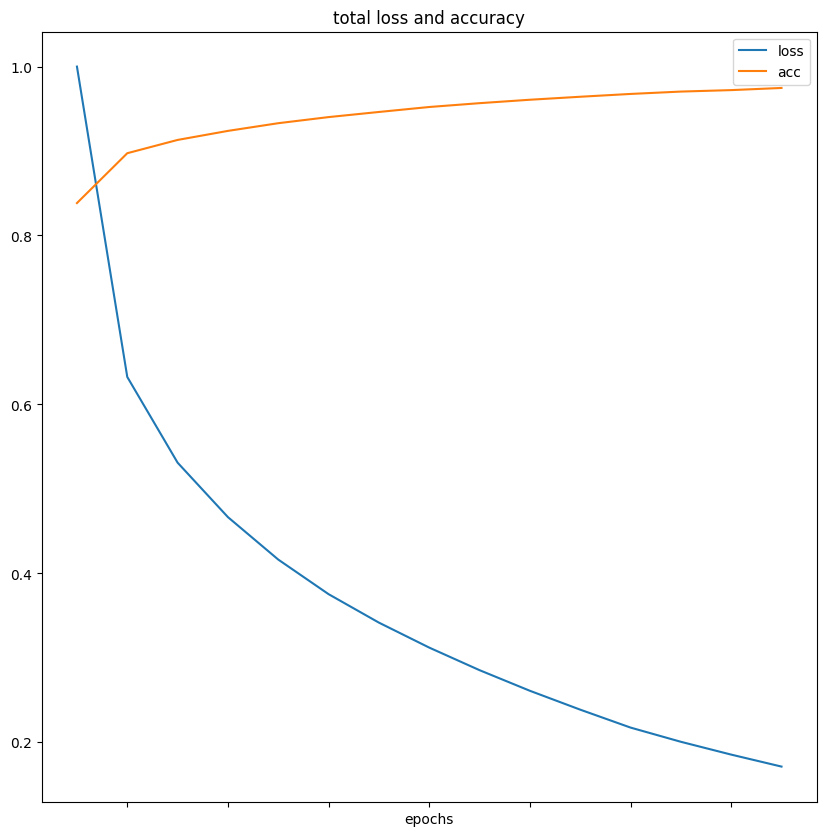

In [19]:
import matplotlib.pyplot as plt
import numpy as np

epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
acc_array = history.history['accuracy']

max_loss = max(loss_array)
loss_array = np.array(loss_array) / max_loss

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, acc_array, label="acc")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

In [20]:
results = model.evaluate(test_data_pre)
print(results)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.4816
[0.4942241311073303, 0.9016000032424927]


In [21]:
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams["figure.figsize"] = [10, 10]
rcParams['xtick.labelbottom'] = False

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


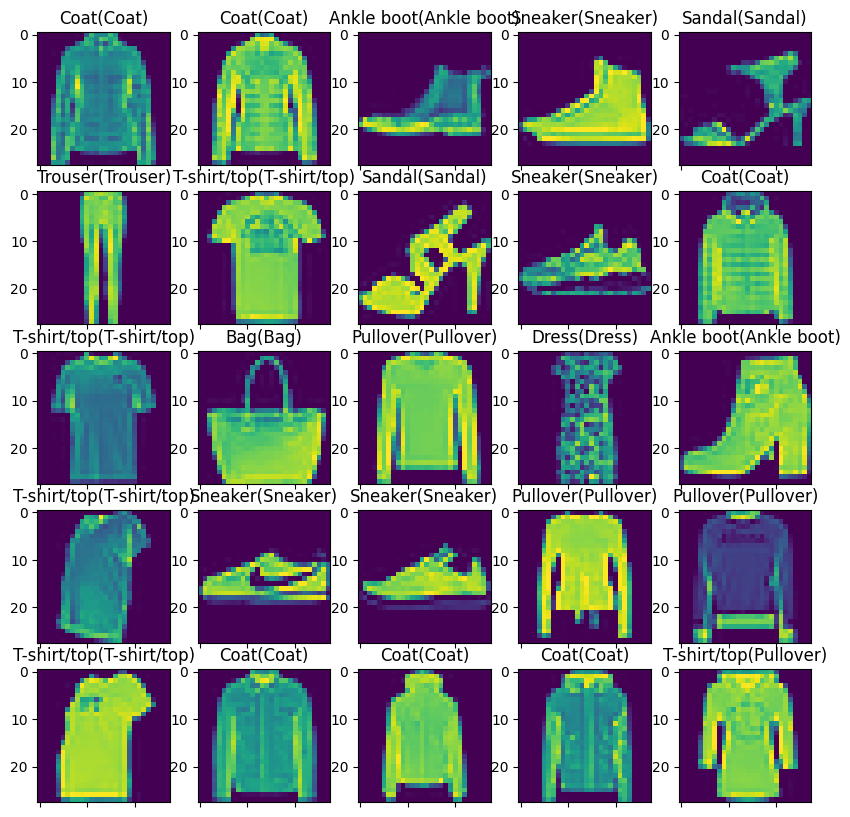

In [22]:
# finally visualize it
x_test = np.concatenate([x for x, y in test_data_pre], axis=0)
y_test = np.concatenate([y for x, y in test_data_pre], axis=0)

test_pred = model.predict(x_test)

for idx, elem in enumerate(test_data.take(25)):
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    plt.subplot(5, 5, idx + 1, title=(names[pred_idx] + "(" + names[true_idx] + ")"))
    plt.imshow(elem['image'][:, :, 0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


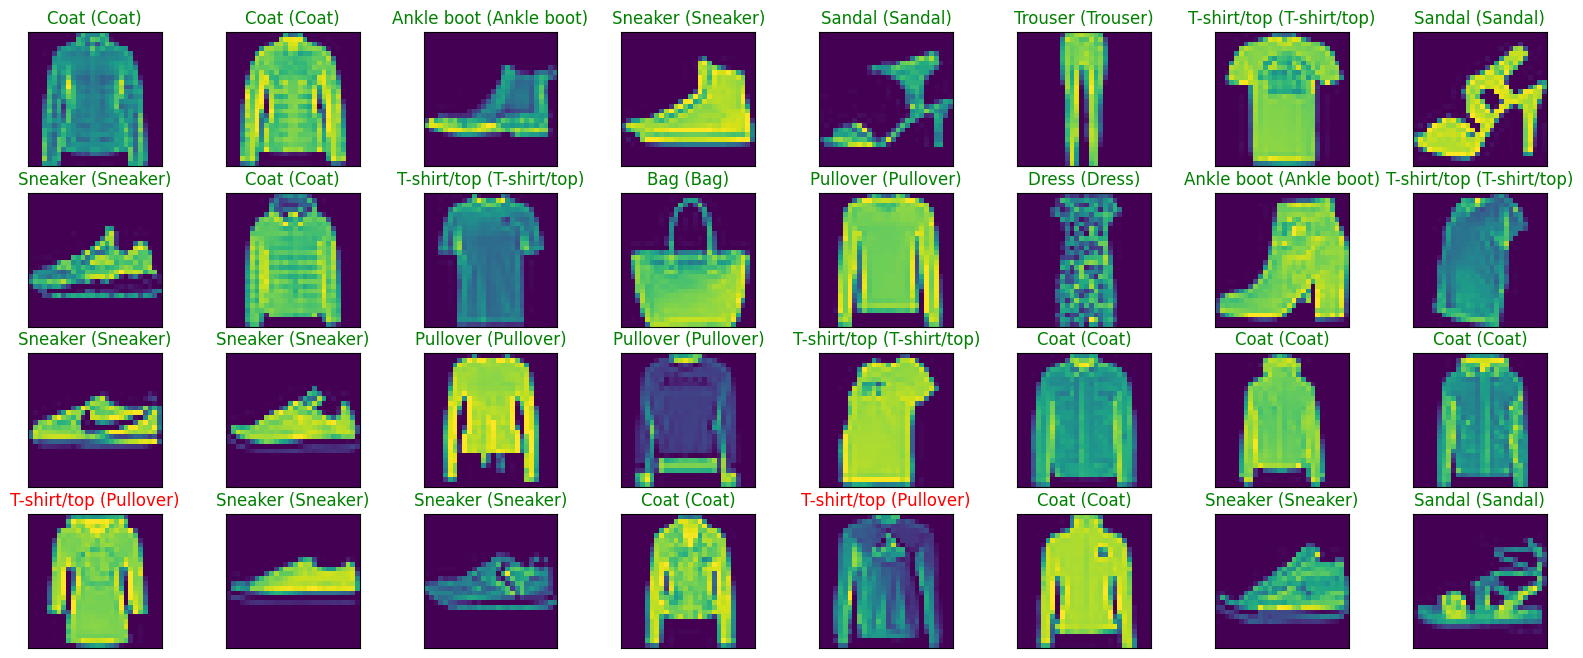

In [23]:
from matplotlib import pyplot

test_pred = model.predict(x_test)
fig = pyplot.figure(figsize=(20, 8))

for idx, elem in enumerate(test_data.take(32)):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(elem['image'][:, :, 0])
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(names[pred_idx], names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
pyplot.show()